#1) Import Datasets And Perform Exploratory Data Analysis (EDA)

##1.1 Importing datasets and observe datasets

In [ ]:
# Libraries

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
train_ds = pd.read_csv(f' ')
test_ds = pd.read_csv(f' ')

In [ ]:
train_ds.head()
test_ds.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
train_ds.shape
test_ds.shape

(23097, 18)

(9303, 17)

^^^

Before performing any actions on the datasets, we will need to have a brief observations of the both datasets.

Train and test datasets which have been provided were assigned into train_ds and test_ds variables.

Based on the output, train_ds has 18 features and 23097 observations whereas test_ds has 17 features and 9303 roobservationsws.

We can see that even though test set has given, but it does not include target variable. It is consider normal in real world scenario because we do not want our machine learning model to learn from the test set.

In [ ]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

In [ ]:
test_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9303 entries, 0 to 9302
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  9303 non-null   int64  
 1   Diagnosed_Condition        9303 non-null   int64  
 2   Patient_ID                 9303 non-null   int64  
 3   Treated_with_drugs         9303 non-null   object 
 4   Patient_Age                9303 non-null   int64  
 5   Patient_Body_Mass_Index    9303 non-null   float64
 6   Patient_Smoker             9303 non-null   object 
 7   Patient_Rural_Urban        9303 non-null   object 
 8   Patient_mental_condition   9303 non-null   object 
 9   A                          9303 non-null   float64
 10  B                          9303 non-null   float64
 11  C                          9303 non-null   float64
 12  D                          9303 non-null   float64
 13  E                          9303 non-null   float

^^^

Obervations of the datasets:


*   train_ds

    1.   All columns are numerical variables except Treated_with_drugs (idx 3), 
Patient_Smoker (idx 6), Patient_Rural_Urban (idx 7) and Patient_mental_condition (idx 8).

    2.   Only idx 3 and idx 9 - 16 have missing values.

    3.   16 features and 1 target variable which is Survived_1_year where 0 means did not survive and 1 means surevived.


*   test_ds

    1.   All columns are numerical variables except Treated_with_drugs (idx 3), 
Patient_Smoker (idx 6), Patient_Rural_Urban (idx 7) and Patient_mental_condition (idx 8).

    2.   No missing values.

    3.   Target variable which is Survived_1_year has been taken out.

All categorical values will be transforming to numerical values using one hot encoding during feature engineering phase for the purpose of training machine learning model.


We will not perform EDA on test set from this stage except one hot encoding and normalizing/ standardizing (depends on the distribution plots and what model will be used, will decide in later stage) because test set is meant to test machine learning model only.

In [ ]:
train_ds.describe(include='all')

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
count,23097.000000,23097.000000,23097.000000,23084,23097.000000,23097.000000,23097,23097,23097,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,23097.000000
unique,NaN,NaN,NaN,32,NaN,NaN,3,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,DX6,NaN,NaN,NO,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,8606,NaN,NaN,13246,16134,23097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,16545.712041,26.413127,6261.280772,NaN,33.209768,23.454820,NaN,NaN,NaN,0.897905,0.136355,0.185070,0.083615,0.393239,0.053700,0.000595,1.750480,0.632247
std,9532.263503,15.030865,3595.990620,NaN,19.549882,3.807661,NaN,NaN,NaN,0.302780,0.343173,0.388363,0.276817,0.488480,0.225431,0.024379,0.770311,0.482204
min,2.000000,0.000000,1.000000,NaN,0.000000,1.089300,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8280.000000,13.000000,3181.000000,NaN,16.000000,20.205550,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16597.000000,26.000000,6242.000000,NaN,33.000000,23.386199,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24825.000000,39.000000,9363.000000,NaN,50.000000,26.788154,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000


^^^

Observe train_ds's partial statistical information such as IQR, std, mean and more.

Based on the output, mean value for each features were different and have huge different hence standardization or normalization will be conducted in later part (decide which to use later).

In [ ]:
train_ds.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index',
       'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition',
       'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond',
       'Survived_1_year'],
      dtype='object')

^^^ 

Check what features do train_ds consists of.

In [ ]:
train_ds.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

^^^

For train_ds, feature Treated_with_drugs has 13 missing values whereas features A, B, C, D, E, F, Z and Number_of_prev_cond have 1235 missing values.

Based on journal, features which have less than 5% of missing values rows can be deleted and it will not cause any bias to ML models. 

In this case, only treated_with_drugs has less than 3% of missing values whereas A, B, C, D, E, F, Z have more than 3% hence we will not drop any missing values so we will check whether if these features are acting as important features. Mode imputation method will be implemented if necessary.

https://pubmed.ncbi.nlm.nih.gov/18652544/

##1.2 Visualizations

In [ ]:
train_ds.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


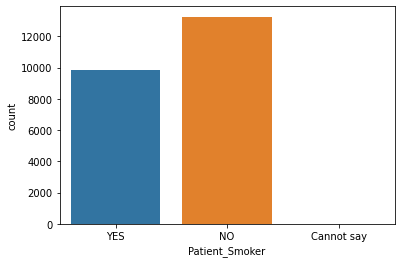

In [ ]:
sns.countplot(data=train_ds, x='Patient_Smoker', label='Count')

In [ ]:
non_smoker, smoker, unidentify = train_ds['Patient_Smoker'].value_counts()
print('Total count of non-smokers: ', non_smoker)
print('Total count of smokers: ', smoker)
print('Total count of unidetify: ', unidentify)

Total count of non-smokers:  13246
Total count of smokers:  9838
Total count of unidetify:  13


^^^ 

Output shows patients who are not smokers have more counts compared to patients who smokes. 

There are a total of 9838 patients who smoke, 13246 patiens who are not smokers and a small portion of 13 patients are unable to be identified whethere they are smokers or non-smokers. 

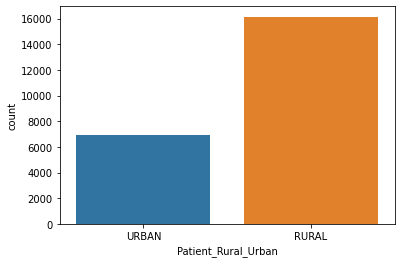

In [ ]:
sns.countplot(data=train_ds, x='Patient_Rural_Urban', label='Count')

In [ ]:
rural, urban = train_ds['Patient_Rural_Urban'].value_counts()
print('Total count of rural: ', rural)
print('Total count of urban: ', urban)

Total count of rural:  16134
Total count of urban:  6963


^^^

Most of the patients, accounted for 16134 counts are located in rural area whereas patients who located in urban area are lesser, which only has 6963 counts.

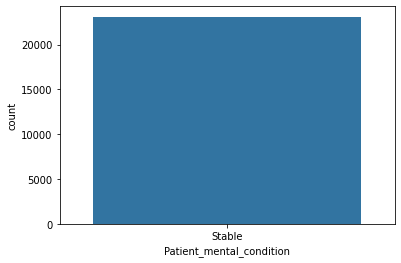

In [ ]:
sns.countplot(data=train_ds, x='Patient_mental_condition', label='Count')

In [ ]:
stable = train_ds['Patient_mental_condition'].value_counts()
print('Total count of stable: ', stable)

Total count of stable:  Stable    23097
Name: Patient_mental_condition, dtype: int64


^^^

All patients wither smokers or non-smokers as well as living in urban or rural areas are in a stable mental condition.

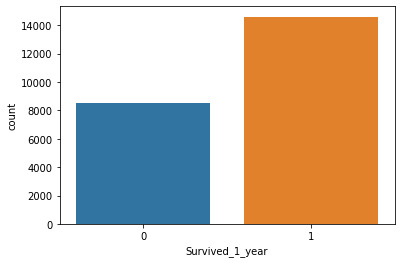

In [ ]:
sns.countplot(data=train_ds, x='Survived_1_year', label='Count')

In [ ]:
survived, not_survived = train_ds['Survived_1_year'].value_counts()
print('Total count of survived: ', survived)
print('Total count of not survived: ', not_survived)

Total count of survived:  14603
Total count of not survived:  8494


^^^

Overall survival count among the patients is 14603 whereas 8494 counts of patients are unfortunate because they do not survive over a year.

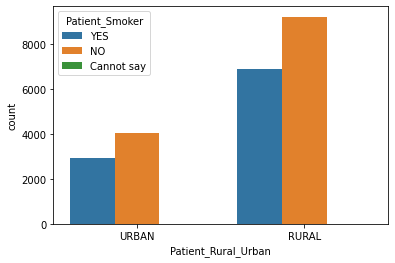

In [ ]:
sns.countplot(data=train_ds, x='Patient_Rural_Urban', hue='Patient_Smoker')

In [ ]:
(pd.DataFrame(train_ds[['Patient_Rural_Urban', 'Patient_Smoker']].value_counts()).sort_values(by='Patient_Rural_Urban')).rename(columns={0:'Frequency'})

Frequency
Patient_Rural_Urban Patient_Smoker           
RURAL               NO                   9211
                    YES                  6910
                    Cannot say             13
URBAN               NO                   4035
                    YES                  2928

^^^

Performing a deeper analysis, we can see that most of the smokers were came from rural areas same goes to non-smokers as compared with patients that came from urban areas. In the meantime, a small patients who cannot be identified as smokers or non-smokers were came from rural areas.

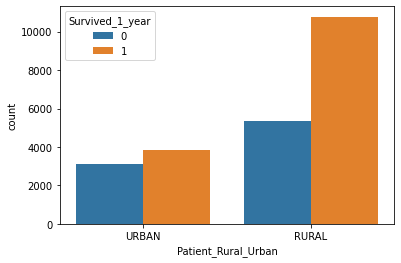

In [ ]:
sns.countplot(data=train_ds, x='Patient_Rural_Urban', hue='Survived_1_year')

In [ ]:
(pd.DataFrame(train_ds[['Patient_Rural_Urban', 'Survived_1_year']].value_counts()).sort_values(by='Patient_Rural_Urban')).rename(columns={0:'Frequency'})

Frequency
Patient_Rural_Urban Survived_1_year           
RURAL               1                    10777
                    0                     5357
URBAN               1                     3826
                    0                     3137

^^^

Patients who came from rural areas tend to have a much higher counts in surviving after 1 year compared to patients from urban areas.

Meanwhile, patients from rural areas have a slightly higher counts of not surviving after 1 year as comapred to patients from urban areas but when comparing the orverall outcomes, patients from rural areas have much better life expectancy.

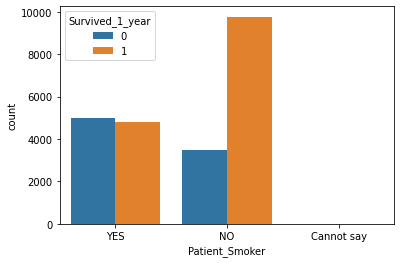

In [ ]:
sns.countplot(data=train_ds, x='Patient_Smoker', hue='Survived_1_year')

^^^ 

In a general visualization, patients who are not smokers have higher counts in surviving after 1 year but patients who are smokers have lower counts in surving after 1 year, counts for not survivng after 1 year has slightly overtake patients who have survived.

Hence, we can say that patients who are not smoking have significantly reduced the risk of not surviving after 1 year.

In [ ]:
(pd.DataFrame(train_ds[['Patient_Smoker', 'Survived_1_year', 'Patient_Rural_Urban']].value_counts())\
 .sort_values(by=['Patient_Smoker', 'Patient_Rural_Urban', 'Survived_1_year'])).rename(columns={0:'Frequency'})

Frequency
Patient_Smoker Survived_1_year Patient_Rural_Urban           
Cannot say     1               RURAL                       13
NO             0               RURAL                     2276
               1               RURAL                     6935
               0               URBAN                     1203
               1               URBAN                     2832
YES            0               RURAL                     3081
               1               RURAL                     3829
               0               URBAN                     1934
               1               URBAN                      994

^^^

Based on the deeper analysis shown as above, patients who have not identified as smokers or non-smokers were came from rural areas and 13 of them has survived after 1 year.

Patients who were identified as non-smokers have higher counts for survivng after 1 year which are 6935 and 2832 for rural and urban areas. Whereas patients who are not surviving after 1 year accounted for 2276 and 1203 for rural and urban areas, respectively.

Patients who were identified as smokers but living in rural areas have higher surving counts which was 3829 compared to urban areas which only has 994. Whereas patients who came from rural areas also have higher counts in not survivng, accounted for 3081 compared to urban areas, which only has 1934.

In [ ]:
train_ds[['Patient_Rural_Urban', 'Patient_Smoker', 'Patient_Age']].groupby(['Patient_Smoker', 'Patient_Rural_Urban'], as_index=False).count().sort_values(by='Patient_Smoker')

,Patient_Smoker,Patient_Rural_Urban,Patient_Age
0,Cannot say,RURAL,13
1,NO,RURAL,9211
2,NO,URBAN,4035
3,YES,RURAL,6910
4,YES,URBAN,2928


In [ ]:
train_ds[['Patient_Rural_Urban', 'Patient_Smoker', 'Patient_Age']].groupby(['Patient_Smoker', 'Patient_Rural_Urban'], as_index=False).mean().sort_values(by='Patient_Smoker')

,Patient_Smoker,Patient_Rural_Urban,Patient_Age
0,Cannot say,RURAL,127.153846
1,NO,RURAL,28.427641
2,NO,URBAN,28.278810
3,YES,RURAL,39.572938
4,YES,URBAN,39.614754


^^^ 

Above two columns show the count and mean by grouping both patient_smoker and patient_rural_urban. As we can see the mean value for patient age in the group of unidentify patient_smoker was high due to less data.

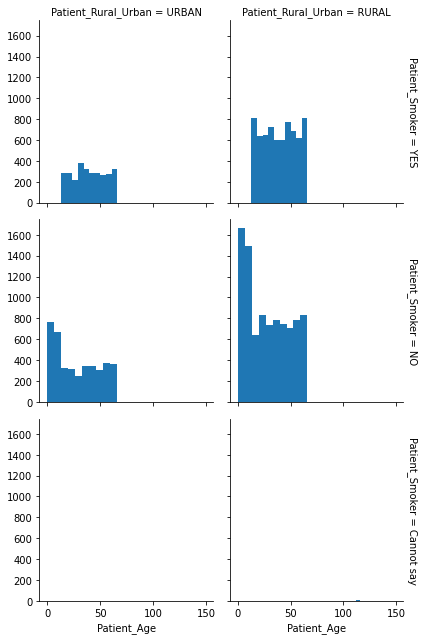

In [ ]:
FG = sns.FacetGrid(train_ds, col='Patient_Rural_Urban', row='Patient_Smoker', margin_titles=True)
FG.map(plt.hist, 'Patient_Age')

^^^ 

Above output shows patients' age based on two categories which were smokers or non-smokers and located in urban or rural areas.

We noticed that there were some patients who were over 100 years old and this might be outliers, distribution plot will be shown in later part.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


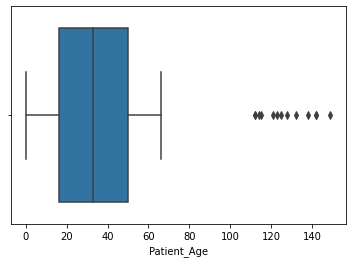

In [ ]:
sns.boxplot(train_ds['Patient_Age'])

^^^

Based on the boxplot above, median value is around 30 where the minimum and maximum age is 0 and around 70, respectively.

Q1 was around 15 which means approximately 25% of patients' age were lower than 15 years old. Q3 was around 50 hence approximately 75% of patients' age were higher than 70 years old.

Other than that, there were some outliers in patients age (over 100 years old) hence we will drop the outliers. 

Based on research, outliers in medical data are not encouraged to drop because everyone's health are different and it is common to have outliers within patients. So when outliers are being removed, it can has have significant effects on the occurrence of type 1 error.

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7485938/

In this case, outliers can be removed because the outliers are in patients' age which has over 100 years old hence it is normal to remove.

In [ ]:
train_ds_copy = train_ds.copy()
train_ds_copy.drop(train_ds_copy[train_ds_copy['Patient_Age'] >= 100].index, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


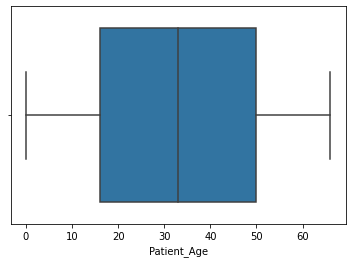

In [ ]:
sns.boxplot(train_ds_copy['Patient_Age'])

In [ ]:
train_ds.shape
train_ds_copy.shape

(23097, 18)

(23084, 18)

^^^ 

Before removing outliers, we will now copy train_ds (original_ds) to a new variable to avoid data corruption or mistakes. Hence, from this stage onwards, all we will be using train_ds_copy.

After assigned a new variable for copied dataset, we dropped row where patients' age is equal or greater than 100.

And lastly, 13 rows have been removed. We assumed that 13 of the rows were unidentified smokers/non-smokers.

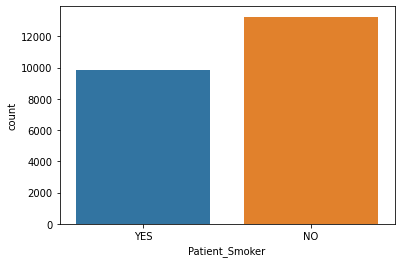

In [ ]:
sns.countplot(data=train_ds_copy, x='Patient_Smoker')

^^^

It has proven 13 rows which have been removed were in the category of unidentified smokers/non-smokers.

In [ ]:
corr = train_ds_copy.corr()
corr

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
ID_Patient_Care_Situation,1.000000,-0.005747,-0.001457,-0.004402,-0.001673,0.007633,0.005523,0.011225,-0.006204,0.001404,0.008031,NaN,0.012126,-0.005432
Diagnosed_Condition,-0.005747,1.000000,0.010052,-0.004247,0.002631,0.001850,0.003525,-0.003327,-0.008166,0.007070,0.005688,NaN,0.003832,-0.003699
Patient_ID,-0.001457,0.010052,1.000000,0.009383,-0.017735,-0.002315,-0.011836,-0.005877,-0.004370,0.001579,0.008092,NaN,-0.007346,-0.004965
Patient_Age,-0.004402,-0.004247,0.009383,1.000000,0.009176,-0.019266,-0.012507,-0.011709,0.004365,-0.002238,0.007430,NaN,-0.016708,-0.077525
Patient_Body_Mass_Index,-0.001673,0.002631,-0.017735,0.009176,1.000000,0.009652,0.001034,-0.018666,-0.009511,-0.006482,-0.016578,NaN,-0.017549,-0.120521
A,0.007633,0.001850,-0.002315,-0.019266,0.009652,1.000000,-0.064556,-0.090918,-0.076801,-0.164966,-0.054944,NaN,0.169220,-0.048654
B,0.005523,0.003525,-0.011836,-0.012507,0.001034,-0.064556,1.000000,-0.021290,-0.002122,-0.017999,-0.016070,NaN,0.392672,-0.049633
C,0.011225,-0.003327,-0.005877,-0.011709,-0.018666,-0.090918,-0.021290,1.000000,0.007443,-0.026529,0.000835,NaN,0.445228,-0.033144
D,-0.006204,-0.008166,-0.004370,0.004365,-0.009511,-0.076801,-0.002122,0.007443,1.000000,-0.013626,-0.009693,NaN,0.320661,-0.105593
E,0.001404,0.007070,0.001579,-0.002238,-0.006482,-0.164966,-0.017999,-0.026529,-0.013626,1.000000,-0.005376,NaN,0.541631,0.021906


<Figure size 2160x1080 with 0 Axes>

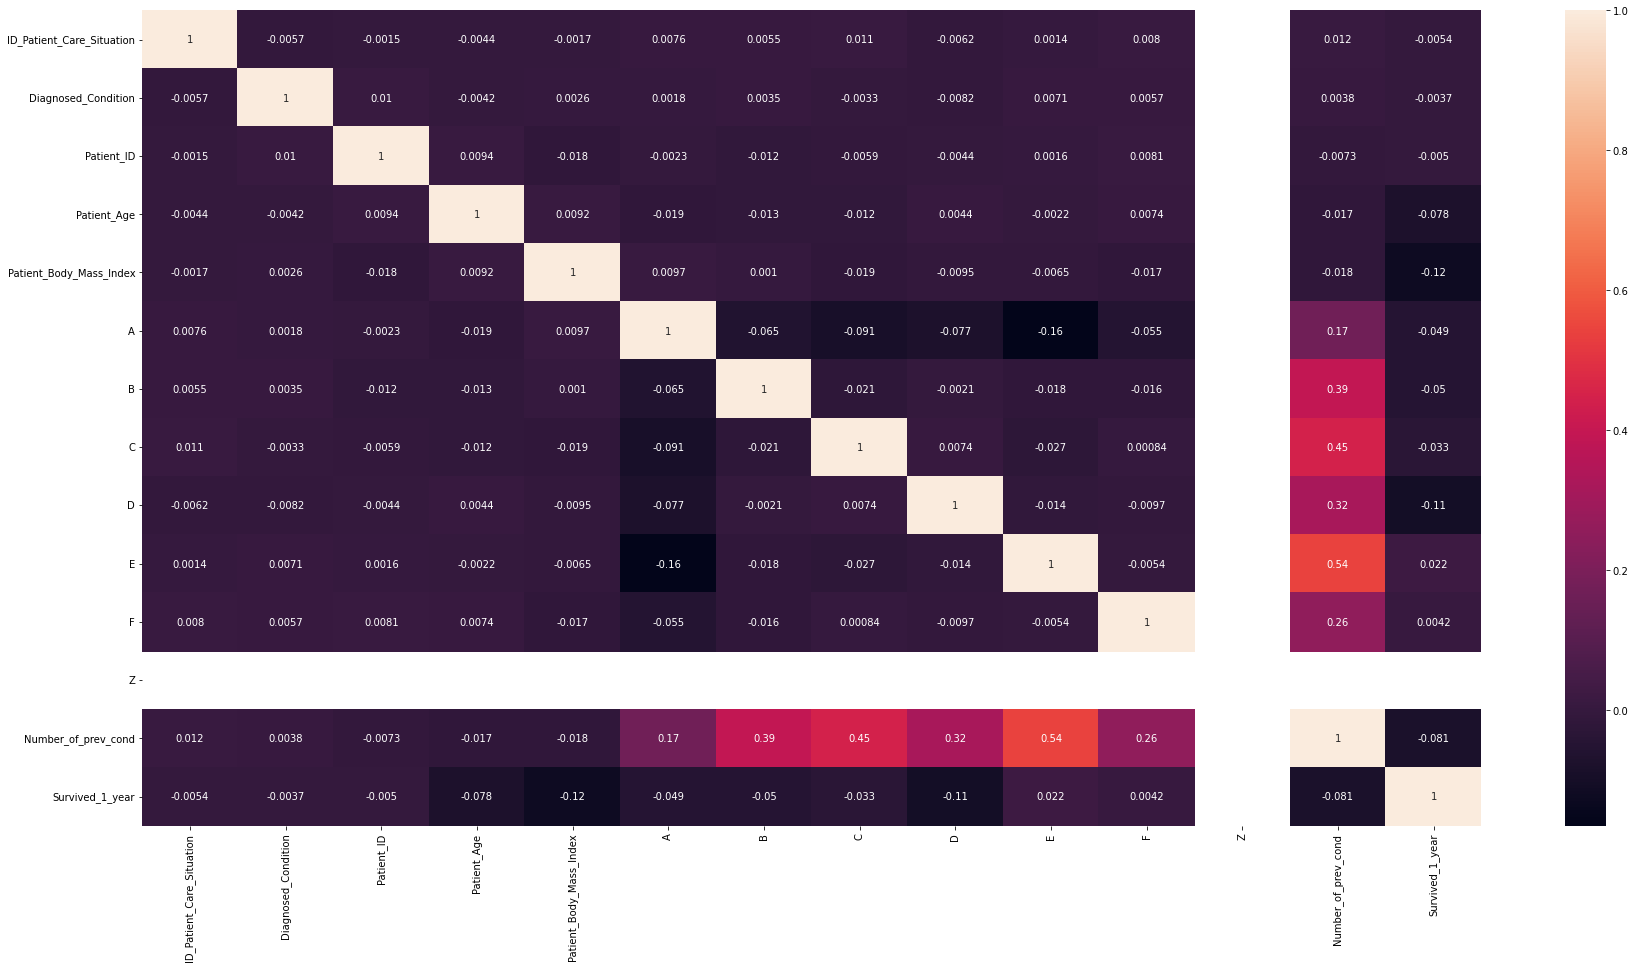

In [ ]:
plt.figure(figsize=(30,15))
sns.heatmap(corr, annot=True)

^^^

Statistical information and visualization for correlations were shown as above. Based on the output, most of the features has low negative and postive correlations only small amount of features were mediumly correlated such as feature E and feature number_of_prev_cond, accounted for 0.54 or feature c and feature number_of_prev_cond, accounted for 0.45.

# 2) Data Manipulations

##2.1 Features Deletion

In [ ]:
del train_ds_copy['Patient_ID']
del train_ds_copy['ID_Patient_Care_Situation']
del train_ds_copy['Diagnosed_Condition']

In [ ]:
train_ds_copy.head()

,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
5,DX6,47,26.155120,YES,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


^^^

Features patient_id and ID_Patient_Care_Situation have been deleted because both of these features do not carry any values hence both of these features have no contribution to machine learning model. Additionally, heatmap proven both of these values have little to no correlation towards target variable.

## 2.2 Imputations and Sum Up

In [ ]:
train_ds_copy[train_ds_copy.isnull().any(axis=1)]

,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
27,DX2,44,27.935658,YES,URBAN,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
36,DX1,4,17.342624,NO,URBAN,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
41,DX2 DX5,12,20.994843,NO,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
97,DX2,49,26.641499,NO,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
105,DX4,41,28.079769,YES,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23002,DX2,26,26.548517,YES,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
23012,DX4,15,18.849124,NO,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
23024,DX2,13,24.343030,NO,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
23038,DX3 DX5,45,19.272509,NO,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
train_ds_copy.isna().sum()

Treated_with_drugs             0
Patient_Age                    0
Patient_Body_Mass_Index        0
Patient_Smoker                 0
Patient_Rural_Urban            0
Patient_mental_condition       0
A                           1235
B                           1235
C                           1235
D                           1235
E                           1235
F                           1235
Z                           1235
Number_of_prev_cond         1235
Survived_1_year                0
dtype: int64

^^^ 
Before imputation, we will check missing values one more time because outliers have been removed.

Previously 13 missing values in Treated_with_drugs have been cleared off hence no further imputation has to be executed for this features.

In [ ]:
col_list = list(train_ds_copy)
col_list

['Treated_with_drugs',
 'Patient_Age',
 'Patient_Body_Mass_Index',
 'Patient_Smoker',
 'Patient_Rural_Urban',
 'Patient_mental_condition',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'Z',
 'Number_of_prev_cond',
 'Survived_1_year']

In [ ]:
for col in col_list[6:13]:
  train_ds_copy[col] = train_ds_copy[col].fillna(train_ds_copy[col].mode()[0])

In [ ]:
train_ds_copy[train_ds_copy.isnull().any(axis=1)]

,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
27,DX2,44,27.935658,YES,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0
36,DX1,4,17.342624,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0
41,DX2 DX5,12,20.994843,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1
97,DX2,49,26.641499,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1
105,DX4,41,28.079769,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23002,DX2,26,26.548517,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1
23012,DX4,15,18.849124,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1
23024,DX2,13,24.343030,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1
23038,DX3 DX5,45,19.272509,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1


^^^

Features A, B, C, D, E, F and Z were imputed using mode because mode tends to has less sensitive to outliers and because these features are 0 and 1 only hence mode is the best approach.

https://www.linkedin.com/pulse/missing-data-imputation-pratibha-shinde/


In [ ]:
# Solution 1, find nan values then only sum up column 6-12 and insert to column 13 but execution time slow
for i, val in train_ds_copy.iterrows():
  if val.isnull().any(axis=0):
    train_ds_copy['Number_of_prev_cond'] = train_ds_copy.iloc[:, 6:13].sum(axis=1)
    

# Solution 2, sum up columns 6-12 and insert to column 13
#train_ds_copy['Number_of_prev_cond'] = train_ds_copy.iloc[:, 6:13].sum(axie=1)


In [ ]:
train_ds_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23084 entries, 0 to 23096
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Treated_with_drugs        23084 non-null  object 
 1   Patient_Age               23084 non-null  int64  
 2   Patient_Body_Mass_Index   23084 non-null  float64
 3   Patient_Smoker            23084 non-null  object 
 4   Patient_Rural_Urban       23084 non-null  object 
 5   Patient_mental_condition  23084 non-null  object 
 6   A                         23084 non-null  float64
 7   B                         23084 non-null  float64
 8   C                         23084 non-null  float64
 9   D                         23084 non-null  float64
 10  E                         23084 non-null  float64
 11  F                         23084 non-null  float64
 12  Z                         23084 non-null  float64
 13  Number_of_prev_cond       23084 non-null  float64
 14  Surviv

^^^

After imputation, we will sum up column 6-12 and insert the answer into column 13.

Above provded 2 solutions, 1 with for loop and 1 with normal approach. Since this dataset is small hence we will use solution 1 for more precise where loop will find row with null values only sum up the columns.

In [ ]:
train_ds_copy.head()

,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
5,DX6,47,26.155120,YES,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


## 2.3 Standardization/ Normalization (Examine it using histogram first only decide use which method)

[Text(0.5, 1.0, "Histogram For Patients' Age and Body Mass Index")]

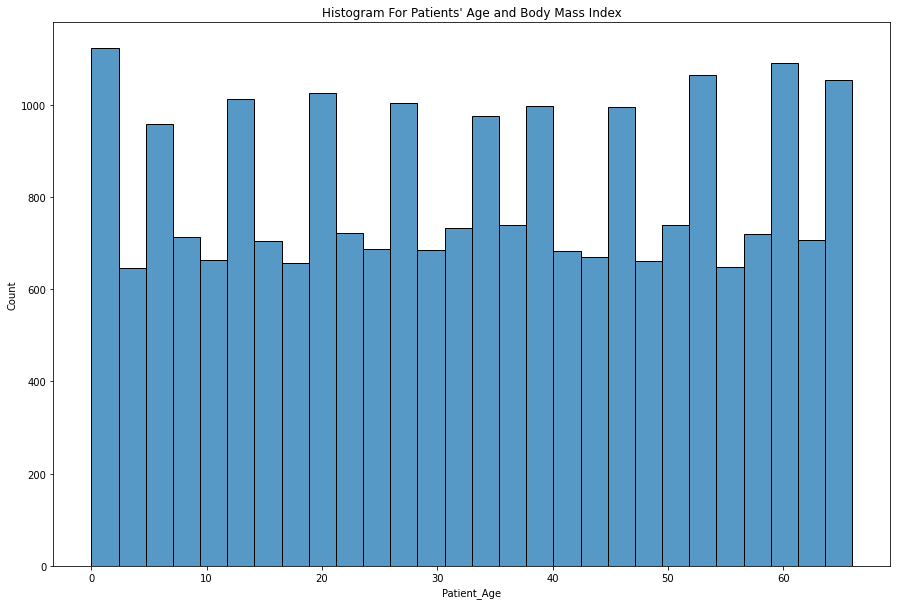

In [ ]:
fig = plt.subplots(figsize=(15,10))
sns.histplot(data=train_ds_copy, x='Patient_Age').set(title="Histogram For Patients' Age and Body Mass Index")

In [ ]:
train_ds_copy['Patient_Body_Mass_Index'].describe()

count    23084.000000
mean        23.467172
std          3.772969
min         17.000336
25%         20.209666
50%         23.387824
75%         26.788780
max         29.999579
Name: Patient_Body_Mass_Index, dtype: float64

^^^

Based on the histogram for patient_age, we can observe the data doesn’t follow a normal distribution hence we will be usin normalization instead of standardization. But, due to age is a common feature where it has different values and is normal to have huge difference hence age will not be normalized even though does not follow the normal distribution.

Whereas for patient body mass index, since the type of values was float hence it was not able to create distribution plot hence we will use normalization as well because it does not follow normal distribution and it was proven at the beginning where the statistical informations for all features have huge difference.

https://towardsdatascience.com/normalization-vs-standardization-explained-209e84d0f81e

In [ ]:
# Libraries for normalization
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

train_ds_copy[['Patient_Body_Mass_Index']] = scaler.fit_transform(train_ds_copy[['Patient_Body_Mass_Index']])

In [ ]:
train_ds_copy

,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,DX6,56,0.113780,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,DX2,36,0.457352,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,DX6,48,0.808485,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,DX1,5,0.163905,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
5,DX6,47,0.704255,YES,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23092,DX2 DX4,14,0.126401,NO,RURAL,Stable,1.0,1.0,0.0,1.0,1.0,1.0,0.0,5.0,0
23093,DX6,55,0.514203,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
23094,DX6,63,0.807716,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
23095,DX3,25,0.516860,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


^^^

We used MinMaxScaler as our normaliztion method for feature patient_body_mass_index because it is a well known and easy method as well as suitable for machine learning model.

In MinMaxScaler, we will use fit_transform as our parameter because the the function will fit into the data and transform it.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html 

After normalization, the data was shown as above where the values of patient_body_mass_index were changed to a smaller float values and nearer to each data points.

https://www.digitalocean.com/community/tutorials/normalize-data-in-python

https://www.researchgate.net/publication/274012376_Normalization_A_Preprocessing_Stage

## 2.4 One-hot Encoding

In [ ]:
train_ds_copy = pd.get_dummies(train_ds_copy, columns=['Treated_with_drugs', 'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition'])

In [ ]:
train_ds_copy.head()
train_ds_copy.shape

,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,...,Treated_with_drugs_DX3 DX5,Treated_with_drugs_DX4,Treated_with_drugs_DX4 DX5,Treated_with_drugs_DX5,Treated_with_drugs_DX6,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN,Patient_mental_condition_Stable
0,56,0.113780,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,...,0,0,0,0,1,0,1,0,1,1
1,36,0.457352,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,1,1,0,1
2,48,0.808485,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,1,0,1,1,0,1
3,5,0.163905,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,1,0,0,1,1
5,47,0.704255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,1,0,1,0,1,1


(23084, 48)

In [ ]:
train_ds_copy.columns

Index(['Patient_Age', 'Patient_Body_Mass_Index', 'A', 'B', 'C', 'D', 'E', 'F',
       'Z', 'Number_of_prev_cond', 'Survived_1_year',
       'Treated_with_drugs_DX1 ', 'Treated_with_drugs_DX1 DX2 ',
       'Treated_with_drugs_DX1 DX2 DX3 ',
       'Treated_with_drugs_DX1 DX2 DX3 DX4 ',
       'Treated_with_drugs_DX1 DX2 DX3 DX4 DX5 ',
       'Treated_with_drugs_DX1 DX2 DX3 DX5 ',
       'Treated_with_drugs_DX1 DX2 DX4 ',
       'Treated_with_drugs_DX1 DX2 DX4 DX5 ',
       'Treated_with_drugs_DX1 DX2 DX5 ', 'Treated_with_drugs_DX1 DX3 ',
       'Treated_with_drugs_DX1 DX3 DX4 ',
       'Treated_with_drugs_DX1 DX3 DX4 DX5 ',
       'Treated_with_drugs_DX1 DX3 DX5 ', 'Treated_with_drugs_DX1 DX4 ',
       'Treated_with_drugs_DX1 DX4 DX5 ', 'Treated_with_drugs_DX1 DX5 ',
       'Treated_with_drugs_DX2 ', 'Treated_with_drugs_DX2 DX3 ',
       'Treated_with_drugs_DX2 DX3 DX4 ',
       'Treated_with_drugs_DX2 DX3 DX4 DX5 ',
       'Treated_with_drugs_DX2 DX3 DX5 ', 'Treated_with_drugs_DX2 DX4 

^^^

One hot encoding is crucial for preprocessing because most of the machine learning models are not able to grab categorical values as parameters, models will only recognise numerical values.

In this dataset, we used dummy variables as our one hot encoding method. Each different values will be created a 1 new column and it will state 1 if it matched.

Hence, after one hot encoding, there were 48 columns instead of 15 columns.


#3) Machine Learning Model

## 3.1 Based Logistic Regression Model

In [ ]:
# Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression

In [ ]:
x = train_ds_copy.loc[:, train_ds_copy.columns != 'Survived_1_year']
y = train_ds_copy['Survived_1_year']

In [ ]:
x.shape
y.shape

(23084, 47)

(23084,)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=14)

In [ ]:
x_train.shape
x_test.shape
y_train.shape
y_test.shape

(16158, 47)

(6926, 47)

(16158,)

(6926,)

^^^

Before building machine learning model, train0ds will be seperated to train and test in the form of purely target variable (y) and solely dependent variables (x).

The ratio of seperation will be 70/30, where 70% goes to train set and 30% goes to test set. There is no right or wrong ratio for building machine learning. Howerver, 70:30 is the recomneded ratio for machine learning models based on research.

https://www.perceptive-analytics.com/building-regression-models-r-using-support-vector-regression/

Furthermore, random_state was stated (random number) in train_test_split for  controls the shuffling process. When random_state was stated, we get the same train and test sets across different executions.

https://towardsdatascience.com/why-do-we-set-a-random-state-in-machine-learning-models-bb2dc68d8431#:~:text=The%20random%20state%20hyperparameter%20in,test%20sets%20across%20different%20executions.

In [ ]:
lr_model = LogisticRegression(solver='liblinear', random_state = 14)
lr_model.fit(x_train, y_train)

LogisticRegression(random_state=14, solver='liblinear')

In [ ]:
lr_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 14,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

^^^

In the process of building machine learning model, we will assign a variable which is lr_model to the logistic regression function. After assigning variable to logistic regression model, we will pass in train set which consists of dependent variables (x) known as x_train and target variable (y) known as y_train so the model able to learn.

Furthermore, we will check the parameters of the machine learning models, there were different parameters in this model hence we only need to focus solver and random_state. Liblinear was chosen as liblinear because it was recommended for small dataset such as this current dataset and random state was set as 14 because it avoid prediction accuracy be different whenever we run.

For more understanding of parameters in the model: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

## 3.2 Model Prediction Performance

In [ ]:
y_pred = lr_model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
lr_model.score(x_test, y_test)

0.7334680912503609

^^^

after LR model has been developed, we will use the model to predict (predict function) test set using test set's dependent variables (x) known as x test. After execution, the predicted result will be shown as 0 or 1.

In the following step, we will check LR model's performance score using test set's dependent variables (x) known as x_test and test set's target variable (y) known as y_test as input parameters.

As the result shown, the score for LR model is 0.7334 ~= 73.34%.

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1313, 1194],
       [ 652, 3767]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


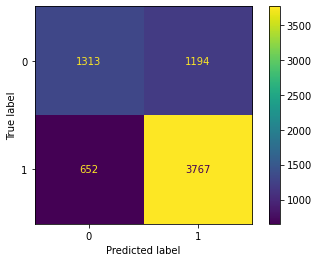

In [ ]:
plot_confusion_matrix(lr_model, x_test, y_test)

^^^

Confusion Matrix is shown as above, in summary:

True positive(TP) = Actual data is positive and predicted data is positve.

True negative(TN) = Actual data is negative and predicted data is negative.

False positive(FP) = Actual data is negative but predicted data is positive.

False negative(FN) = Actual data is positive but predicted data is negative.

TP = 1313

TN = 3767

FP = 652

FN = 1194

In [ ]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7334680912503609
              precision    recall  f1-score   support

           0       0.67      0.52      0.59      2507
           1       0.76      0.85      0.80      4419

    accuracy                           0.73      6926
   macro avg       0.71      0.69      0.70      6926
weighted avg       0.73      0.73      0.73      6926



^^^ 

A detail performance report of RF model has shown as above. Accuracy of the model that showed in this report is tally with the accuracy which showed during model performance above.

## 3.2 Hyperparameter Tuning for Logistic Model

In [ ]:
#Libraries
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = [
    {'penalty':['l1', 'l2', 'elasticnet', 'none'],
     'C':[2,4],
     'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
     'max_iter':[100, 1000]
     }
]

^^^

For tuning the parameters of logistic regression, first we will need to use GridSerchCV function. After imported, we will create a variable names as param_grid to store all the parameters( penalty, c, solver and max_iter) we wish to search for logistc regression model.

In param_grid, c was given 2 and 4 whereas maxiter was given 100 and 1000 only because if more numbers have given to these 2 parameters, it will take a very long time to run in next step. The higher numbers in these two parameters, the more combinations it need to be ran and longer time it takes.

In this parameters, only 800 combinations have to run, tried 7200 combinations but after 1 hour plus, results still have not came out.

In [ ]:
search_param = GridSearchCV(lr_model, param_grid=param_grid, cv=10, verbose=True, n_jobs=-1)

In [ ]:
best_search_param = search_param.fit(x_train, y_train)
best_search_param

Fitting 10 folds for each of 80 candidates, totalling 800 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
360 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solv

GridSearchCV(cv=10,
             estimator=LogisticRegression(random_state=14, solver='liblinear'),
             n_jobs=-1,
             param_grid=[{'C': [2, 4], 'max_iter': [100, 1000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}],
             verbose=True)

^^^

After stated the parameters, we will use GridSearchCV function and input all the parameters which have been declared previously. In GridSearchCV, we were using 10-fold-corss-validations because it was proven the optimum number for parameter tuning no matter in small or big datasets.

https://www.researchgate.net/publication/324701535_Cross-Validation

In [ ]:
best_search_param.best_estimator_

LogisticRegression(C=4, random_state=14)

In [ ]:
best_y_pred = best_search_param.predict(x_test)
best_y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
best_search_param.score(x_test, y_test)

0.7354894600057753

^^^

After parameter tuning completed, we will check the best parameter of the model. Based on the output, we can see that LR model with the paramters of c=2, penalty=none and randonm_state at 14 has produced the best outcome.
The accuracy has improved slightly from 0.7333237077678314 to 0.7343343921455385, improved 0.002165752.

LR model after hyperparameter tuning in this case was expected to have little to no improvement because grid search has given less parameters else the running time would be very long.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


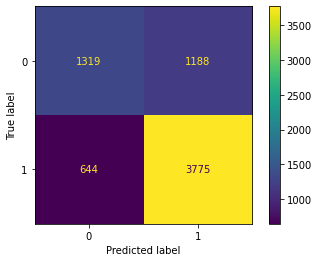

In [ ]:
plot_confusion_matrix(best_search_param, x_test, y_test)

^^^

Confusion Matrix is shown as above, in summary:

True positive(TP) = Actual data is positive and predicted data is positve.

True negative(TN) = Actual data is negative and predicted data is negative.

False positive(FP) = Actual data is negative but predicted data is positive.

False negative(FN) = Actual data is positive but predicted data is negative.

TP = 1319

TN = 3775

FP = 644

FN = 1188

# 4) Using Tuned LR Model To Predict Given test_ds

## 4.1 Copy test_ds

In [ ]:
test_ds_copy = test_ds.copy()
test_ds.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


^^^

As a good practise, always copy original dataset to a new variable to avoid data corruption.

## 4.2) Perform Nessecary Data Manipulations

In [ ]:
del test_ds_copy['Patient_ID']
del test_ds_copy['ID_Patient_Care_Situation']
del test_ds_copy['Diagnosed_Condition']

In [ ]:
test_ds_copy.head()

,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


^^^

Features patient_id and ID_Patient_Care_Situation have been deleted because both of these features do not carry any values hence both of these features have no contribution to machine learning model. Additionally, heatmap proven both of these values have little to no correlation towards target variable. Similar to train_ds_copy, no imputation has to be carried out in test_ds_copy as proven no missing values in this test set.

In [ ]:
test_ds_copy[['Patient_Body_Mass_Index']] = scaler.fit_transform(test_ds_copy[['Patient_Body_Mass_Index']])

In [ ]:
test_ds_copy.head()

,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,DX3,16,0.957251,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,DX6,24,0.756652,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,DX4 DX5,63,0.655640,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,DX6,42,0.782410,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,DX3,50,0.658172,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


^^^

Using same method from train_ds_copy for normalization in test_ds_copy (MinMaxScaler)

## 4.3 One-hot Encoding

In [ ]:
test_ds_copy = pd.get_dummies(test_ds_copy, columns=['Treated_with_drugs', 'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition'])

In [ ]:
test_ds_copy.head()
test_ds_copy.shape

,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,...,Treated_with_drugs_DX3 DX5,Treated_with_drugs_DX4,Treated_with_drugs_DX4 DX5,Treated_with_drugs_DX5,Treated_with_drugs_DX6,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN,Patient_mental_condition_Stable
0,16,0.957251,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,...,0,0,0,0,0,1,0,1,0,1
1,24,0.756652,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0,0,0,0,1,1,0,0,1,1
2,63,0.655640,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,...,0,0,1,0,0,1,0,1,0,1
3,42,0.782410,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,...,0,0,0,0,1,1,0,0,1,1
4,50,0.658172,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,1,0,1,0,1


(9303, 47)

^^^

After one hot encoding, there were 47 columns instead of 14 columns.

## 4.5 Tuned LR Model To Predict And Get Outcome for test_ds 

In [ ]:
tuned_LR_outcome = best_search_param.predict(test_ds_copy)
tuned_LR_outcome

array([1, 0, 1, ..., 1, 0, 0])

In [ ]:
test_ds_copy['LR Model Outcome'] = tuned_LR_outcome

In [ ]:
test_ds_copy

,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,...,Treated_with_drugs_DX4,Treated_with_drugs_DX4 DX5,Treated_with_drugs_DX5,Treated_with_drugs_DX6,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN,Patient_mental_condition_Stable,LR Model Outcome
0,16,0.957251,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,...,0,0,0,0,1,0,1,0,1,1
1,24,0.756652,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0,0,0,1,1,0,0,1,1,0
2,63,0.655640,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,...,0,1,0,0,1,0,1,0,1,1
3,42,0.782410,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,...,0,0,0,1,1,0,0,1,1,0
4,50,0.658172,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9298,28,0.931281,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,...,0,0,0,1,1,0,1,0,1,0
9299,4,0.278176,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0,0,0,0,1,0,0,1,1,1
9300,20,0.594410,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,1,0,1,1,1
9301,33,0.039752,1.0,1.0,1.0,1.0,0.0,1.0,0.0,5.0,...,1,0,0,0,1,0,0,1,1,0


^^^

After nessecary steps have been taken to manipulate test_ds, we will use LR model that has been tuned to perform prediction and assigned the outcome into a new column name as LR Model Outcome in test_ds.

Hence, the outcome has shown as above.

# 5) Export To HTML

In [ ]:
import nbconvert
!jupyter nbconvert --to html Wong_Khai_Xuan_John_Assessment.ipynb

[NbConvertApp] Converting notebook Wong_Khai_Xuan_John_Assessment.ipynb to html
[NbConvertApp] Writing 820191 bytes to Wong_Khai_Xuan_John_Assessment.html
